In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

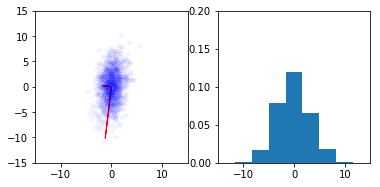

In [2]:
m = 1000
n = 2
mu = np.zeros(2)
Sigma = np.array([[2,1],[1,10]])
X = np.random.multivariate_normal(mu,Sigma,size=m)
s,V = np.linalg.eig(X.T@X/m)

fig,axs=plt.subplots(1,2)

axs[0].plot(X[:,0],X[:,1],'b*',alpha=3e-2)

axs[0].arrow(0,0,s[0]*V[0,0],s[0]*V[1,0],edgecolor='r')
axs[0].arrow(0,0,s[1]*V[0,1],s[1]*V[1,1],edgecolor='r')

axs[0].set_xlim((-15,15))
axs[0].set_ylim((-15,15))
axs[0].set_aspect('equal')

t = np.linspace(-15,15,10)
axs[1].hist(X@V[:,1],t,density=True)
axs[1].set_xlim((-15,15))
axs[1].set_ylim((0,.2))
axs[1].set_aspect(150)

plt.savefig('Gaussian.png')

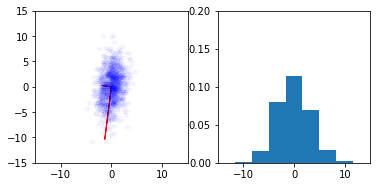

In [3]:
m = 1000
n = 2
mu = np.zeros(2)
Sigma = np.array([[2,1],[1,10]])
X = np.random.multivariate_normal(mu,Sigma,size=m)
s,V = np.linalg.eig(X.T@X/m)

fig,axs=plt.subplots(1,2)

axs[0].plot(X[:,0],X[:,1],'b*',alpha=3e-2)

axs[0].arrow(0,0,s[0]*V[0,0],s[0]*V[1,0],edgecolor='r')
axs[0].arrow(0,0,s[1]*V[0,1],s[1]*V[1,1],edgecolor='r')

axs[0].set_xlim((-15,15))
axs[0].set_ylim((-15,15))
axs[0].set_aspect('equal')

t = np.linspace(-15,15,10)
axs[1].hist(X@V[:,1],t,density=True)
axs[1].set_xlim((-15,15))
axs[1].set_ylim((0,.2))
axs[1].set_aspect(150)

plt.savefig('RobustPCA.png')

In [4]:
from mlxtend.data import loadlocal_mnist
X, y = loadlocal_mnist(
        images_path='/Users/tristan/Work/CollegeTour/Unsupervised/train-images-idx3-ubyte', 
        labels_path='/Users/tristan/Work/CollegeTour/Unsupervised/train-labels-idx1-ubyte')

Xt = X[y==7,:].T
m = Xt.shape[1]
n = Xt.shape[0]

In [5]:
U,S,Vh = np.linalg.svd(Xt)

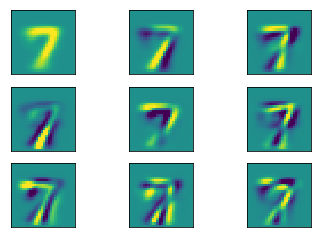

In [6]:
fig,axs=plt.subplots(3,3)

k = 0
for i in range(3):
    for j  in range(3):
        axs[i,j].imshow(-U[:,k].reshape(28,28),vmin=-.1,vmax=.1)
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        k = k + 1
plt.savefig('mnist_pca.png')

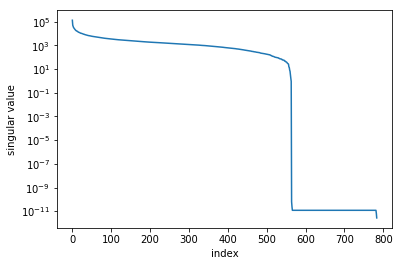

In [7]:
plt.semilogy(S)
plt.xlabel('index')
plt.ylabel('singular value')
plt.savefig('mnist_sigma')

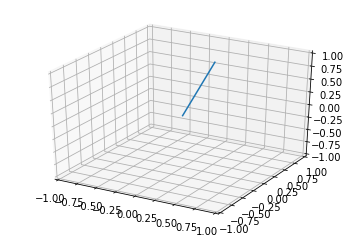

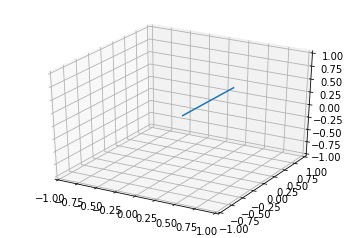

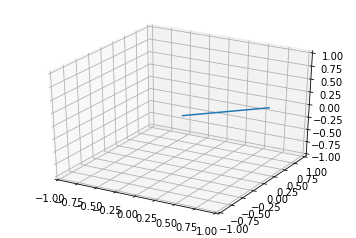

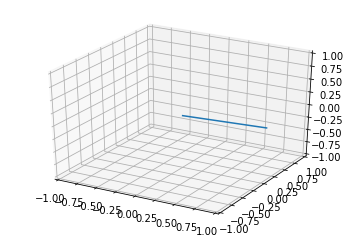

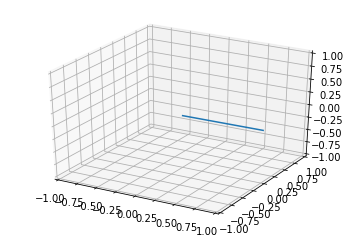

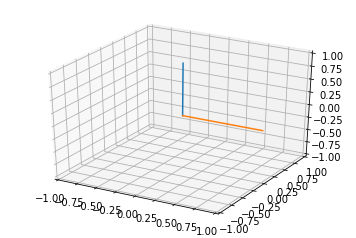

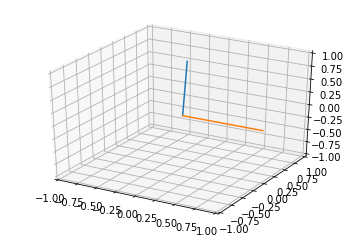

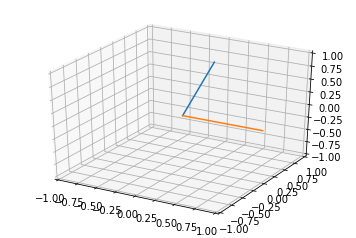

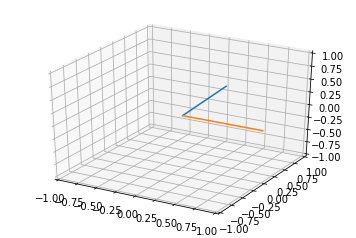

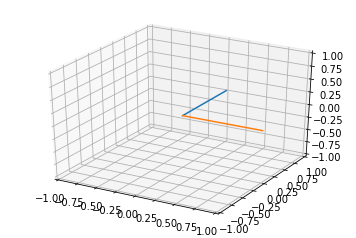

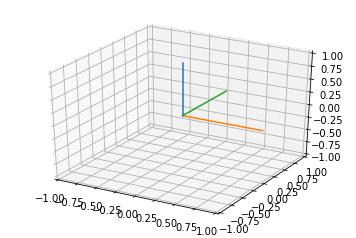

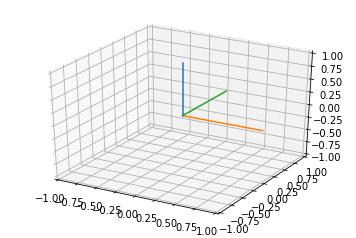

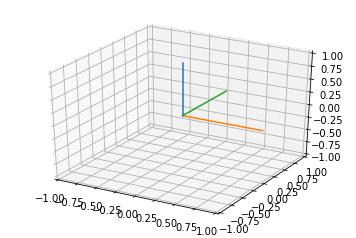

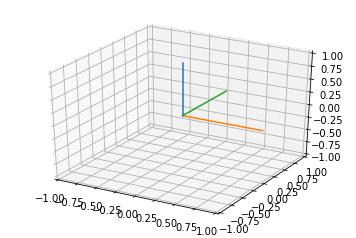

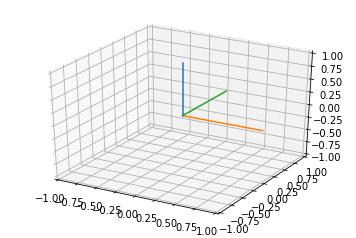

In [25]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import imageio

A = np.array([[2,0,0],[0,1,0],[0,0,.5]])

def power_method(k, v0,u1=[0,0,0],u2=[0,0,0]):
    v1 = np.linalg.matrix_power(A,k)@v0
    v1 = v1/np.linalg.norm(v1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot([0,v1[0]],[0,v1[1]],[0,v1[2]])
    ax.plot([0,u1[0]],[0,u1[1]],[0,u1[2]])
    ax.plot([0,u2[0]],[0,u2[1]],[0,u2[2]])
    # IMPORTANT ANIMATION CODE HERE
    # Used to keep the limits constant
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

u1 = np.array([1,0,0])
u2 = np.array([0,1,0])
u3 = np.array([0,0,1])

v0 = np.array([.1,10,10])
v0 = v0/np.linalg.norm(v0)
imageio.mimsave('powers1.gif', [power_method(i,v0) for i in range(5)], fps=1)

v0 = np.array([0,.1,10])
v0 = v0/np.linalg.norm(v0)
imageio.mimsave('powers2.gif', [power_method(i,v0,u1) for i in range(5)], fps=1)

v0 = np.array([0,0,1])
v0 = v0/np.linalg.norm(v0)
imageio.mimsave('powers3.gif', [power_method(i,v0,u1,u2) for i in range(5)], fps=1)

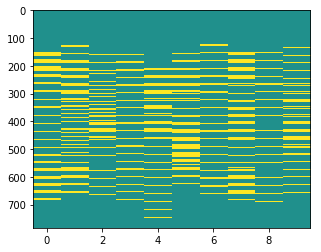

In [349]:
fig,axs=plt.subplots(1)

axs.imshow(X[:10].T,vmin=-.1,vmax=.1)
axs.set_aspect(.01)
plt.savefig('tensor1.png')

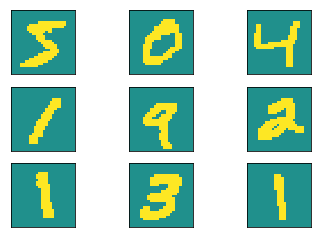

In [343]:
fig,axs=plt.subplots(3,3)

k = 0
for i in range(3):
    for j  in range(3):
        axs[i,j].imshow(X[k].reshape(28,28),vmin=-.1,vmax=.1)
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        k = k + 1
plt.savefig('tensor2.png')

In [32]:
f = lambda  x,y : (x-0.5)**2 + (y - .5)**2
df = lambda x,y : np.array([2*(x - 0.5), 2*(y - 0.5)])

r = lambda x,y : np.abs(x**2 + y**2 - 1)
dr = lambda x,y : np.array([np.sign(x**2 + y**2 - 1)*(2*x), np.sign(x**2 + y**2 - 1)*(2*y)])
alpha = 1e2

In [34]:
niter = 1000
x0 = np.array([-1,0])
s1 = 1
s2 = 2e-3

x1 = np.zeros((2*niter,2))
x2 = np.zeros((2*niter,2))

x1[0] = x0
x2[0] = x0

for k in range(0,2*niter-2,2):
    x1[k+1] = x1[k] - s1*(np.eye(2) - np.outer(x1[k],x1[k]))@(df(x1[k,0],x1[k,1]))
    x1[k+2] = x1[k+1]/np.linalg.norm(x1[k+1])
    x2[k+1] = x2[k] - s2*(df(x2[k,0],x2[k,1]) + alpha*dr(x2[k,0],x2[k,1]))
    x2[k+2] = x2[k+1] - s2*(df(x2[k+1,0],x2[k+1,1]) + alpha*dr(x2[k+1,0],x2[k+1,1]))

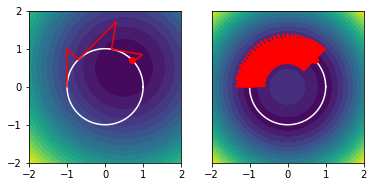

In [38]:
t = np.linspace(-2,2,100)
a = np.linspace(0,2*np.pi,100)

xx,yy = np.meshgrid(t,t)

fig,axs=plt.subplots(1,2)

axs[0].contourf(xx,yy,f(xx,yy),20)
axs[0].plot(np.cos(a),np.sin(a),'w',np.cos(np.pi/4),np.sin(np.pi/4),'ro')
axs[0].plot(x1[:-1,0],x1[:-1,1],'r')
axs[0].set_aspect('equal')

axs[1].contourf(xx,yy,f(xx,yy) + alpha*r(xx,yy),20)
axs[1].plot(np.cos(a),np.sin(a),'w',np.cos(np.pi/4),np.sin(np.pi/4),'ro')
axs[1].plot(x2[:-1,0],x2[:-1,1],'r')
axs[1].set_aspect('equal')
axs[1].set_yticks([])

plt.savefig('manifold.png')

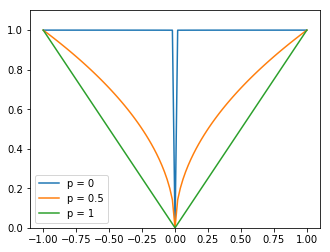

In [30]:
t = np.linspace(-1,1,101)

fig,axs=plt.subplots(1)

axs.plot(t,np.abs(t)**0.0001, label='p = 0')
axs.plot(t,np.abs(t)**0.5, label='p = 0.5')

axs.plot(t,np.abs(t)**1, label='p = 1')
axs.set_ylim([0,1.1])
axs.set_aspect(1.5)
axs.legend()

fig.savefig('nuclearnorm.png')